In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.externals import joblib 
from catboost import Pool, CatBoostClassifier, cv
from sklearn.model_selection import GridSearchCV , cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
import catboost as cb

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data1 = pd.read_csv('taiwan_data.csv')

In [3]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [54]:
len(data1[data1["PAY_0"]==0])

14737

In [4]:
print(data1.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


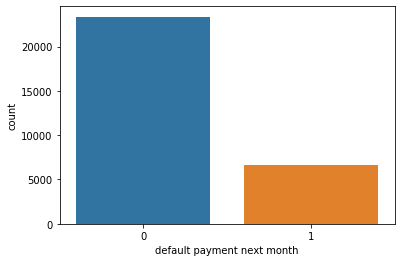

In [5]:
sns.countplot(data1['default payment next month'],label="Count")
plt.show()

#### On remarque un desequilbre entre les classes(Yes(1), No(0))

In [6]:
23364/(23364+6636)

0.7788

#### Diviser les données en données d'apprentissage et données de test 

In [7]:
y = data1.iloc[:,-1]   # Enregistrer la varialbe target
x = data1.iloc[:,0:-1]; # Enleveer la colonne target


In [8]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Classification Algorithms

In [11]:
Models_results=pd.DataFrame()

###  K-Nearest Neighbors

Text(0, 0.5, 'Erreur')

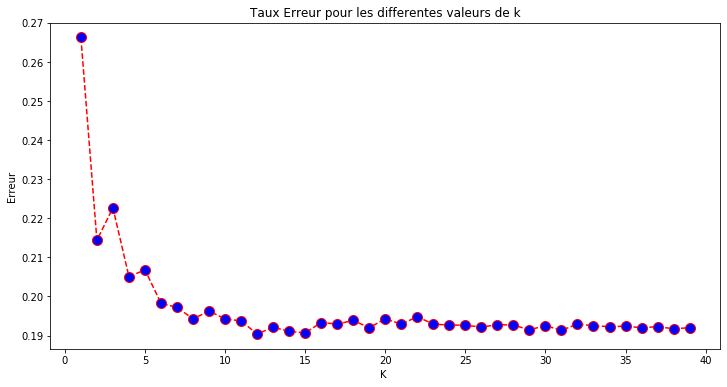

In [12]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [13]:
#Best k is 12 for standardScaler

In [14]:
def K_Nearest_Neighbors(Models_results,k):
    knn = KNeighborsClassifier(k)
    knn_model=knn.fit(X_train, y_train)
    y_pred_knn =knn_model.predict(X_test)
    print(knn_model,'\n')
    print(confusion_matrix(y_test, y_pred_knn))
    print(classification_report(y_test,y_pred_knn))
    roc=roc_auc_score(y_test, y_pred_knn)
    acc = accuracy_score(y_test,y_pred_knn)
    prec = precision_score(y_test, y_pred_knn)
    rec = recall_score(y_test,y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    model =  pd.DataFrame([['K Nearest Neighbors', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    # Save the model as a pickle in a file 
    joblib.dump(knn, 'Taiwan_knn.pkl') 
    return M

In [15]:
Models_results=K_Nearest_Neighbors(Models_results,12)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform') 

[[5565  267]
 [1161  507]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.66      0.30      0.42      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.63      0.65      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy of KNN classifier on training set: 0.82
Accuracy of KNN classifier on test set: 0.81


### CART

In [16]:
def Cart(Models_results):
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
    dtc_model=dtc.fit(X_train, y_train)
    y_pred_dtc = dtc_model.predict(X_test)
    print(dtc_model,'\n')
    print(confusion_matrix(y_test, y_pred_dtc))
    print(classification_report(y_test,y_pred_dtc))
    roc=roc_auc_score(y_test, y_pred_dtc)
    acc = accuracy_score(y_test,y_pred_dtc)
    prec = precision_score(y_test, y_pred_dtc)
    rec = recall_score(y_test,y_pred_dtc)
    f1 = f1_score(y_test, y_pred_dtc)
    model =  pd.DataFrame([['Classification and Regression Trees', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of CART classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Accuracy of CART classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    from sklearn.externals import joblib 
  
    # Save the model as a pickle in a file 
    joblib.dump(dtc, 'Taiwan_Cart.pkl') 
    return M

In [17]:
Models_results=Cart(Models_results)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 

[[4735 1097]
 [1017  651]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      5832
           1       0.37      0.39      0.38      1668

    accuracy                           0.72      7500
   macro avg       0.60      0.60      0.60      7500
weighted avg       0.72      0.72      0.72      7500

Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.72


### Random Forest

In [18]:
def Random_Forest(Models_results):    
    rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state=0)
    rfc_model = rfc.fit(X_train, y_train)
    y_pred_rfc = rfc_model.predict(X_test)
    print(rfc_model,'\n')
    print(confusion_matrix(y_test, y_pred_rfc))
    print(classification_report(y_test,y_pred_rfc))
    roc=roc_auc_score(y_test,y_pred_rfc)
    acc = accuracy_score(y_test,y_pred_rfc)
    prec = precision_score(y_test, y_pred_rfc)
    rec = recall_score(y_test,y_pred_rfc)
    f1 = f1_score(y_test,y_pred_rfc)
    model =  pd.DataFrame([['Random Forest', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfc.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
    from sklearn.externals import joblib 
  
    # Save the model as a pickle in a file 
    joblib.dump(rfc, 'Taiwan_Random_Forest.pkl') 

    return M

In [19]:
Models_results=Random_Forest(Models_results)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False) 

[[5554  278]
 [1108  560]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5832
           1       0.67      0.34      0.45      1668

    accuracy                           0.82      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.82


### Stochastic Gradient descent

In [20]:
def Stochastic_Gradient_Descent(Models_results):    
    sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
    sgd_model=sgd.fit(X_train, y_train)
    y_pred_stochastic_gradient_descent = sgd_model.predict(X_test)
    print(sgd_model,'\n')
    print(confusion_matrix(y_test,y_pred_stochastic_gradient_descent))
    print(classification_report(y_test,y_pred_stochastic_gradient_descent))
    roc=roc_auc_score(y_test,y_pred_stochastic_gradient_descent)
    acc = accuracy_score(y_test,y_pred_stochastic_gradient_descent)
    prec = precision_score(y_test,y_pred_stochastic_gradient_descent)
    rec = recall_score(y_test,y_pred_stochastic_gradient_descent)
    f1 = f1_score(y_test,y_pred_stochastic_gradient_descent)
    model =  pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Stochastic Gradient Descent classifier on training set: {:.2f}'.format(sgd.score(X_train, y_train)))
    print('Accuracy of Stochastic Gradient Descent classifier on test set: {:.2f}'.format(sgd.score(X_test, y_test)))
    # Save the model as a pickle in a file 
    joblib.dump(sgd, 'Taiwan_Stochastic_Gradient_Descent.pkl') 
    return M

In [21]:
Models_results=Stochastic_Gradient_Descent(Models_results)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False) 

[[5604  228]
 [1185  483]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.68      0.29      0.41      1668

    accuracy                           0.81      7500
   macro avg       0.75      0.63      0.65      7500
weighted avg       0.79      0.81      0.78      7500

Accuracy of Stochastic Gradient Descent classifier on training set: 0.81
Accuracy of Stochastic Gradient Descent classifier on test set: 0.81


### SVM

In [22]:
def Support_Vector_Machine(Models_results):    
    scv = SVC()
    svc_model=scv.fit(X_train, y_train)
    y_pred_svm = svc_model.predict(X_test)
    print(svc_model,'\n')
    print(confusion_matrix(y_test,y_pred_svm))
    print(classification_report(y_test,y_pred_svm))
    roc=roc_auc_score(y_test,y_pred_svm)
    acc = accuracy_score(y_test,y_pred_svm)
    prec = precision_score(y_test,y_pred_svm)
    rec = recall_score(y_test,y_pred_svm)
    f1 = f1_score(y_test,y_pred_svm)
    model =  pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Support Vector Machine classifier on training set: {:.2f}'.format(scv.score(X_train, y_train)))
    print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(scv.score(X_test, y_test)))
    # Save the model as a pickle in a file 
    joblib.dump(scv, 'Taiwan_Support_Vector_Machine.pkl') 
    return M

In [23]:
Models_results=Support_Vector_Machine(Models_results)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) 

[[5574  258]
 [1102  566]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5832
           1       0.69      0.34      0.45      1668

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy of Support Vector Machine classifier on training set: 0.83
Accuracy of Support Vector Machine classifier on test set: 0.82


### Catboost

In [24]:
def Catboost():    
    catt = cb.CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=0)
    catt_model=catt.fit(X_train, y_train,eval_set=(X_test,y_test))
    y_pred_catt = catt_model.predict(X_test)
    print(catt_model,'\n')
    print(confusion_matrix(y_test,y_pred_catt))
    print(classification_report(y_test,y_pred_catt))
    roc=roc_auc_score(y_test,y_pred_catt)
    acc = accuracy_score(y_test,y_pred_catt)
    prec = precision_score(y_test,y_pred_catt)
    rec = recall_score(y_test,y_pred_catt)
    f1 = f1_score(y_test,y_pred_catt)
    model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
    print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))
    joblib.dump(catt, 'Taiwan_Catboost.pkl') 
    return M

In [25]:
Models_results=Catboost()

Learning rate set to 0.108201
0:	learn: 0.8212889	test: 0.8172000	best: 0.8172000 (0)	total: 144ms	remaining: 2m 23s
1:	learn: 0.8212000	test: 0.8180000	best: 0.8180000 (1)	total: 205ms	remaining: 1m 42s
2:	learn: 0.8209778	test: 0.8177333	best: 0.8180000 (1)	total: 263ms	remaining: 1m 27s
3:	learn: 0.8216444	test: 0.8188000	best: 0.8188000 (3)	total: 327ms	remaining: 1m 21s
4:	learn: 0.8217778	test: 0.8181333	best: 0.8188000 (3)	total: 393ms	remaining: 1m 18s
5:	learn: 0.8219111	test: 0.8182667	best: 0.8188000 (3)	total: 456ms	remaining: 1m 15s
6:	learn: 0.8230667	test: 0.8200000	best: 0.8200000 (6)	total: 523ms	remaining: 1m 14s
7:	learn: 0.8231111	test: 0.8196000	best: 0.8200000 (6)	total: 589ms	remaining: 1m 13s
8:	learn: 0.8232000	test: 0.8185333	best: 0.8200000 (6)	total: 648ms	remaining: 1m 11s
9:	learn: 0.8222222	test: 0.8192000	best: 0.8200000 (6)	total: 715ms	remaining: 1m 10s
10:	learn: 0.8224889	test: 0.8185333	best: 0.8200000 (6)	total: 778ms	remaining: 1m 9s
11:	learn: 0.

95:	learn: 0.8279111	test: 0.8169333	best: 0.8201333 (27)	total: 6.74s	remaining: 1m 3s
96:	learn: 0.8283556	test: 0.8168000	best: 0.8201333 (27)	total: 6.82s	remaining: 1m 3s
97:	learn: 0.8284000	test: 0.8170667	best: 0.8201333 (27)	total: 6.89s	remaining: 1m 3s
98:	learn: 0.8284889	test: 0.8172000	best: 0.8201333 (27)	total: 6.94s	remaining: 1m 3s
99:	learn: 0.8285333	test: 0.8173333	best: 0.8201333 (27)	total: 7s	remaining: 1m 3s
100:	learn: 0.8285333	test: 0.8173333	best: 0.8201333 (27)	total: 7.03s	remaining: 1m 2s
101:	learn: 0.8283556	test: 0.8172000	best: 0.8201333 (27)	total: 7.09s	remaining: 1m 2s
102:	learn: 0.8282667	test: 0.8168000	best: 0.8201333 (27)	total: 7.16s	remaining: 1m 2s
103:	learn: 0.8283556	test: 0.8166667	best: 0.8201333 (27)	total: 7.22s	remaining: 1m 2s
104:	learn: 0.8283556	test: 0.8166667	best: 0.8201333 (27)	total: 7.28s	remaining: 1m 2s
105:	learn: 0.8283111	test: 0.8168000	best: 0.8201333 (27)	total: 7.34s	remaining: 1m 1s
106:	learn: 0.8284889	test: 0

189:	learn: 0.8301333	test: 0.8168000	best: 0.8201333 (27)	total: 12.3s	remaining: 52.3s
190:	learn: 0.8302222	test: 0.8166667	best: 0.8201333 (27)	total: 12.3s	remaining: 52.2s
191:	learn: 0.8307111	test: 0.8166667	best: 0.8201333 (27)	total: 12.4s	remaining: 52.2s
192:	learn: 0.8308000	test: 0.8168000	best: 0.8201333 (27)	total: 12.5s	remaining: 52.1s
193:	learn: 0.8307556	test: 0.8168000	best: 0.8201333 (27)	total: 12.5s	remaining: 52s
194:	learn: 0.8307556	test: 0.8168000	best: 0.8201333 (27)	total: 12.6s	remaining: 51.9s
195:	learn: 0.8308000	test: 0.8170667	best: 0.8201333 (27)	total: 12.6s	remaining: 51.9s
196:	learn: 0.8308000	test: 0.8170667	best: 0.8201333 (27)	total: 12.7s	remaining: 51.8s
197:	learn: 0.8307111	test: 0.8169333	best: 0.8201333 (27)	total: 12.8s	remaining: 51.7s
198:	learn: 0.8307556	test: 0.8169333	best: 0.8201333 (27)	total: 12.8s	remaining: 51.6s
199:	learn: 0.8308000	test: 0.8169333	best: 0.8201333 (27)	total: 12.9s	remaining: 51.5s
200:	learn: 0.8308889	t

284:	learn: 0.8349778	test: 0.8153333	best: 0.8201333 (27)	total: 17.9s	remaining: 44.8s
285:	learn: 0.8350222	test: 0.8156000	best: 0.8201333 (27)	total: 17.9s	remaining: 44.7s
286:	learn: 0.8349778	test: 0.8156000	best: 0.8201333 (27)	total: 18s	remaining: 44.7s
287:	learn: 0.8349333	test: 0.8153333	best: 0.8201333 (27)	total: 18s	remaining: 44.6s
288:	learn: 0.8349778	test: 0.8156000	best: 0.8201333 (27)	total: 18.1s	remaining: 44.5s
289:	learn: 0.8348444	test: 0.8156000	best: 0.8201333 (27)	total: 18.1s	remaining: 44.4s
290:	learn: 0.8348889	test: 0.8158667	best: 0.8201333 (27)	total: 18.2s	remaining: 44.4s
291:	learn: 0.8349333	test: 0.8158667	best: 0.8201333 (27)	total: 18.3s	remaining: 44.3s
292:	learn: 0.8349333	test: 0.8158667	best: 0.8201333 (27)	total: 18.3s	remaining: 44.2s
293:	learn: 0.8349333	test: 0.8158667	best: 0.8201333 (27)	total: 18.4s	remaining: 44.1s
294:	learn: 0.8349333	test: 0.8157333	best: 0.8201333 (27)	total: 18.4s	remaining: 44s
295:	learn: 0.8349778	test:

378:	learn: 0.8362667	test: 0.8165333	best: 0.8201333 (27)	total: 23.5s	remaining: 38.6s
379:	learn: 0.8362667	test: 0.8165333	best: 0.8201333 (27)	total: 23.6s	remaining: 38.5s
380:	learn: 0.8363556	test: 0.8165333	best: 0.8201333 (27)	total: 23.7s	remaining: 38.5s
381:	learn: 0.8365778	test: 0.8168000	best: 0.8201333 (27)	total: 23.7s	remaining: 38.4s
382:	learn: 0.8368444	test: 0.8164000	best: 0.8201333 (27)	total: 23.8s	remaining: 38.3s
383:	learn: 0.8368444	test: 0.8165333	best: 0.8201333 (27)	total: 23.9s	remaining: 38.3s
384:	learn: 0.8369333	test: 0.8168000	best: 0.8201333 (27)	total: 23.9s	remaining: 38.2s
385:	learn: 0.8368889	test: 0.8168000	best: 0.8201333 (27)	total: 24s	remaining: 38.2s
386:	learn: 0.8370222	test: 0.8165333	best: 0.8201333 (27)	total: 24.1s	remaining: 38.1s
387:	learn: 0.8369333	test: 0.8165333	best: 0.8201333 (27)	total: 24.1s	remaining: 38.1s
388:	learn: 0.8370667	test: 0.8165333	best: 0.8201333 (27)	total: 24.2s	remaining: 38s
389:	learn: 0.8369778	tes

473:	learn: 0.8393778	test: 0.8165333	best: 0.8201333 (27)	total: 29.9s	remaining: 33.1s
474:	learn: 0.8393333	test: 0.8165333	best: 0.8201333 (27)	total: 29.9s	remaining: 33.1s
475:	learn: 0.8393778	test: 0.8164000	best: 0.8201333 (27)	total: 30s	remaining: 33s
476:	learn: 0.8393778	test: 0.8165333	best: 0.8201333 (27)	total: 30.1s	remaining: 33s
477:	learn: 0.8394667	test: 0.8165333	best: 0.8201333 (27)	total: 30.1s	remaining: 32.9s
478:	learn: 0.8395111	test: 0.8165333	best: 0.8201333 (27)	total: 30.2s	remaining: 32.9s
479:	learn: 0.8394667	test: 0.8166667	best: 0.8201333 (27)	total: 30.3s	remaining: 32.8s
480:	learn: 0.8394222	test: 0.8168000	best: 0.8201333 (27)	total: 30.3s	remaining: 32.7s
481:	learn: 0.8394667	test: 0.8166667	best: 0.8201333 (27)	total: 30.4s	remaining: 32.6s
482:	learn: 0.8395111	test: 0.8166667	best: 0.8201333 (27)	total: 30.4s	remaining: 32.6s
483:	learn: 0.8395111	test: 0.8168000	best: 0.8201333 (27)	total: 30.5s	remaining: 32.5s
484:	learn: 0.8396444	test:

568:	learn: 0.8399556	test: 0.8169333	best: 0.8201333 (27)	total: 35.7s	remaining: 27s
569:	learn: 0.8399111	test: 0.8168000	best: 0.8201333 (27)	total: 35.8s	remaining: 27s
570:	learn: 0.8399111	test: 0.8168000	best: 0.8201333 (27)	total: 35.8s	remaining: 26.9s
571:	learn: 0.8400000	test: 0.8168000	best: 0.8201333 (27)	total: 35.9s	remaining: 26.8s
572:	learn: 0.8399556	test: 0.8168000	best: 0.8201333 (27)	total: 35.9s	remaining: 26.8s
573:	learn: 0.8399111	test: 0.8170667	best: 0.8201333 (27)	total: 36s	remaining: 26.7s
574:	learn: 0.8400000	test: 0.8169333	best: 0.8201333 (27)	total: 36s	remaining: 26.6s
575:	learn: 0.8400000	test: 0.8168000	best: 0.8201333 (27)	total: 36.1s	remaining: 26.6s
576:	learn: 0.8400889	test: 0.8169333	best: 0.8201333 (27)	total: 36.2s	remaining: 26.5s
577:	learn: 0.8403111	test: 0.8169333	best: 0.8201333 (27)	total: 36.2s	remaining: 26.4s
578:	learn: 0.8403111	test: 0.8170667	best: 0.8201333 (27)	total: 36.3s	remaining: 26.4s
579:	learn: 0.8404444	test: 0

661:	learn: 0.8413333	test: 0.8170667	best: 0.8201333 (27)	total: 41.1s	remaining: 21s
662:	learn: 0.8412889	test: 0.8170667	best: 0.8201333 (27)	total: 41.1s	remaining: 20.9s
663:	learn: 0.8412889	test: 0.8172000	best: 0.8201333 (27)	total: 41.2s	remaining: 20.8s
664:	learn: 0.8411556	test: 0.8168000	best: 0.8201333 (27)	total: 41.3s	remaining: 20.8s
665:	learn: 0.8411556	test: 0.8168000	best: 0.8201333 (27)	total: 41.3s	remaining: 20.7s
666:	learn: 0.8412000	test: 0.8168000	best: 0.8201333 (27)	total: 41.3s	remaining: 20.6s
667:	learn: 0.8412000	test: 0.8169333	best: 0.8201333 (27)	total: 41.4s	remaining: 20.6s
668:	learn: 0.8412000	test: 0.8169333	best: 0.8201333 (27)	total: 41.4s	remaining: 20.5s
669:	learn: 0.8412000	test: 0.8169333	best: 0.8201333 (27)	total: 41.5s	remaining: 20.4s
670:	learn: 0.8412000	test: 0.8169333	best: 0.8201333 (27)	total: 41.6s	remaining: 20.4s
671:	learn: 0.8412000	test: 0.8169333	best: 0.8201333 (27)	total: 41.6s	remaining: 20.3s
672:	learn: 0.8414667	t

756:	learn: 0.8424889	test: 0.8173333	best: 0.8201333 (27)	total: 46.7s	remaining: 15s
757:	learn: 0.8424000	test: 0.8173333	best: 0.8201333 (27)	total: 46.8s	remaining: 14.9s
758:	learn: 0.8424000	test: 0.8174667	best: 0.8201333 (27)	total: 46.8s	remaining: 14.9s
759:	learn: 0.8424889	test: 0.8172000	best: 0.8201333 (27)	total: 46.9s	remaining: 14.8s
760:	learn: 0.8424889	test: 0.8169333	best: 0.8201333 (27)	total: 47s	remaining: 14.7s
761:	learn: 0.8424889	test: 0.8169333	best: 0.8201333 (27)	total: 47s	remaining: 14.7s
762:	learn: 0.8425778	test: 0.8170667	best: 0.8201333 (27)	total: 47s	remaining: 14.6s
763:	learn: 0.8425778	test: 0.8170667	best: 0.8201333 (27)	total: 47.1s	remaining: 14.5s
764:	learn: 0.8425333	test: 0.8169333	best: 0.8201333 (27)	total: 47.1s	remaining: 14.5s
765:	learn: 0.8425333	test: 0.8169333	best: 0.8201333 (27)	total: 47.2s	remaining: 14.4s
766:	learn: 0.8425778	test: 0.8169333	best: 0.8201333 (27)	total: 47.3s	remaining: 14.4s
767:	learn: 0.8425778	test: 0

851:	learn: 0.8432000	test: 0.8170667	best: 0.8201333 (27)	total: 52.2s	remaining: 9.06s
852:	learn: 0.8432889	test: 0.8170667	best: 0.8201333 (27)	total: 52.2s	remaining: 9s
853:	learn: 0.8432000	test: 0.8172000	best: 0.8201333 (27)	total: 52.3s	remaining: 8.94s
854:	learn: 0.8433333	test: 0.8172000	best: 0.8201333 (27)	total: 52.3s	remaining: 8.88s
855:	learn: 0.8432444	test: 0.8169333	best: 0.8201333 (27)	total: 52.4s	remaining: 8.81s
856:	learn: 0.8433778	test: 0.8168000	best: 0.8201333 (27)	total: 52.5s	remaining: 8.76s
857:	learn: 0.8434667	test: 0.8169333	best: 0.8201333 (27)	total: 52.5s	remaining: 8.7s
858:	learn: 0.8435111	test: 0.8170667	best: 0.8201333 (27)	total: 52.6s	remaining: 8.63s
859:	learn: 0.8435556	test: 0.8169333	best: 0.8201333 (27)	total: 52.7s	remaining: 8.57s
860:	learn: 0.8436000	test: 0.8169333	best: 0.8201333 (27)	total: 52.7s	remaining: 8.51s
861:	learn: 0.8436444	test: 0.8169333	best: 0.8201333 (27)	total: 52.8s	remaining: 8.45s
862:	learn: 0.8437333	tes

944:	learn: 0.8448889	test: 0.8161333	best: 0.8201333 (27)	total: 58s	remaining: 3.38s
945:	learn: 0.8449333	test: 0.8160000	best: 0.8201333 (27)	total: 58.1s	remaining: 3.31s
946:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.1s	remaining: 3.25s
947:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.2s	remaining: 3.19s
948:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.3s	remaining: 3.13s
949:	learn: 0.8450222	test: 0.8162667	best: 0.8201333 (27)	total: 58.3s	remaining: 3.07s
950:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.4s	remaining: 3.01s
951:	learn: 0.8449778	test: 0.8161333	best: 0.8201333 (27)	total: 58.5s	remaining: 2.95s
952:	learn: 0.8448889	test: 0.8162667	best: 0.8201333 (27)	total: 58.5s	remaining: 2.88s
953:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.6s	remaining: 2.82s
954:	learn: 0.8449778	test: 0.8162667	best: 0.8201333 (27)	total: 58.6s	remaining: 2.76s
955:	learn: 0.8450222	t

#### Logistic Regression

In [26]:
def Logistic_Regression():
    log = LogisticRegression()
    log_model= log.fit(X_train,y_train)
    print(log_model,'\n')
    y_pred_log_reg = log_model.predict(X_test)
    print(confusion_matrix(y_test, y_pred_log_reg))
    print(classification_report(y_test,y_pred_log_reg))
    roc=roc_auc_score(y_test, y_pred_log_reg)
    acc = accuracy_score(y_test,y_pred_log_reg)
    prec = precision_score(y_test, y_pred_log_reg)
    rec = recall_score(y_test, y_pred_log_reg)
    f1 = f1_score(y_test, y_pred_log_reg)
    model =  pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of Logistic_Regression classifier on training set: {:.2f}'.format(log.score(X_train, y_train)))
    print('Accuracy of Logistic_Regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))
    joblib.dump(log, 'Taiwan_Logistic_Regression.pkl') 
    return M

In [27]:
Models_results=Logistic_Regression()

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

[[5667  165]
 [1266  402]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5832
           1       0.71      0.24      0.36      1668

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500

Accuracy of Logistic_Regression classifier on training set: 0.81
Accuracy of Logistic_Regression classifier on test set: 0.81


### XGBoost

In [29]:
def XGBoost():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred =xgb.predict(X_test)
    print(xgb,'\n')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    model =  pd.DataFrame([['XGBooost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of XGBoost classifier on training set: {:.2f}'.format(xgb.score(X_train, y_train)))
    print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
    joblib.dump(xgb, 'Taiwan_XGBoost.pkl') 
    return M

In [30]:
Models_results=XGBoost()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 

[[5554  278]
 [1077  591]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5832
           1       0.68      0.35      0.47      1668

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Accuracy of XGBoost classifier on training set: 0.83
Accuracy of XGBoost classifier on test set: 0.82


### Grid Search on XGBoost

In [31]:
def xgb_grid_Search():
    xgb=XGBClassifier()
    params_grid_xgb = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }
    grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=params_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
    grid_search_xgb_model = grid_search_xgb.fit(X_train,y_train)
    y_pred =grid_search_xgb.predict(X_test)
    print(grid_search_xgb,'\n')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    roc=roc_auc_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    model =  pd.DataFrame([['XGBoost Tuned', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    M = Models_results.append(model, ignore_index = True)
    print('Accuracy of XGBoost Tuned classifier on training set: {:.2f}'.format(grid_search_xgb.score(X_train, y_train)))
    print('Accuracy of XGBoost Tuned classifier on test set: {:.2f}'.format(grid_search_xgb.score(X_test, y_test)))
    joblib.dump(grid_search_xgb, 'Taiwan_XGB_GridSearch.pkl') 
    return M

In [32]:
Models_results=xgb_grid_Search()

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'mi

## Conclusion

In [40]:
Models_results.sort_values(by=["Accuracy"],ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
5,Catboost,0.820133,0.690107,0.347122,0.461907,0.651270
8,XGBoost Tuned,0.819467,0.683841,0.350120,0.463125,0.651912
7,XGBooost,0.819333,0.680092,0.354317,0.465905,0.653324
4,Support Vector Machine,0.818667,0.686893,0.339329,0.454254,0.647545
2,Random Forest,0.815200,0.668258,0.335731,0.446927,0.644032
3,Stochastic Gradient Descent,0.811600,0.679325,0.289568,0.406053,0.625237
0,K Nearest Neighbors,0.809600,0.655039,0.303957,0.415233,0.629087
6,Logistic_Regression,0.809200,0.708995,0.241007,0.359732,0.606358
1,Classification and Regression Trees,0.718133,0.372426,0.390288,0.381148,0.601094
